## vscode test

# 생활이동 자치구(작은거) 그래프로 표현하기

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import networkx as nx
from pyvis.network import Network

In [2]:
# with open("../large-datasets/생활이동_행정동_202209/생활이동_행정동_2022.09_00시.csv", encoding="cp949") as f:
    # data = csv.reader(f)
    # data = pd.read_csv(f)
    
    
    # for row in data:
        # print(row)

from os import listdir
# from os.path import isfile, join
onlyfiles = [f for f in listdir("../large-datasets/생활이동_자치구_202209/")]
print(sorted(onlyfiles))

for filename in sorted(onlyfiles):
    with open("../large-datasets/생활이동_자치구_202209/"+filename, encoding='cp949') as f:
        print(filename)
        data = pd.read_csv(f)
        print( data.sort_values(by='평균 이동 시간(분)')[::-1].head(10) )
    
    print()

    

['생활이동_자치구_2022.09_00시.csv', '생활이동_자치구_2022.09_01시.csv', '생활이동_자치구_2022.09_02시.csv', '생활이동_자치구_2022.09_03시.csv', '생활이동_자치구_2022.09_04시.csv', '생활이동_자치구_2022.09_05시.csv', '생활이동_자치구_2022.09_06시.csv', '생활이동_자치구_2022.09_07시.csv', '생활이동_자치구_2022.09_08시.csv', '생활이동_자치구_2022.09_09시.csv', '생활이동_자치구_2022.09_10시.csv', '생활이동_자치구_2022.09_11시.csv', '생활이동_자치구_2022.09_12시.csv', '생활이동_자치구_2022.09_13시.csv', '생활이동_자치구_2022.09_14시.csv', '생활이동_자치구_2022.09_15시.csv', '생활이동_자치구_2022.09_16시.csv', '생활이동_자치구_2022.09_17시.csv', '생활이동_자치구_2022.09_18시.csv', '생활이동_자치구_2022.09_19시.csv', '생활이동_자치구_2022.09_20시.csv', '생활이동_자치구_2022.09_21시.csv', '생활이동_자치구_2022.09_22시.csv', '생활이동_자치구_2022.09_23시.csv']
생활이동_자치구_2022.09_00시.csv
          대상연월 요일  도착시간  출발 시군구 코드  도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
658606  202209  금     0      11240      35000  M  15   EH         3423   86.21
473069  202209  목     0      11120      31370  F  15   WE         1724    8.12
197135  202209  월     0      21000      11090  F  15   EH        

0         27.44
1         28.28
2          28.1
3         27.77
4         11.92
          ...  
828412        *
828413     5.96
828414      3.3
828415     3.28
828416     4.64
Name: 이동인구(합), Length: 828417, dtype: object
785476


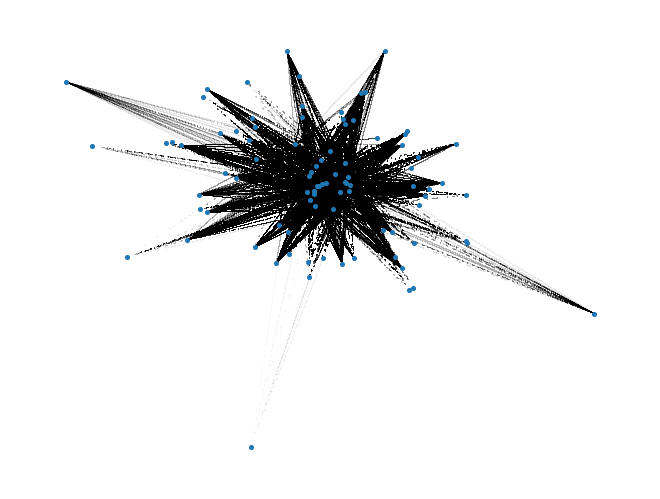

'\ngravitationalConstant 를 줄이면 넓어진다\n'

In [3]:
#from os import listdir

# from mpl_toolkits.basemap import Basemap as Basemap # 이건 지도용

# from os.path import isfile, join
#onlyfiles = [f for f in listdir("../large-datasets/생활이동_자치구_202209/")]
# print(sorted(onlyfiles))

with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv", encoding='cp949') as f:
    data = pd.read_csv(f)
    # l.append(data)
    print(data['이동인구(합)'])
#data = data.drop_duplicates(subset=['출발 시군구 코드', '도착 시군구 코드'],)
data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0
print(data['이동인구(합)'].size)

graph = nx.from_pandas_edgelist(data, source='출발 시군구 코드', target='도착 시군구 코드', edge_attr='이동인구(합)', create_using=nx.MultiDiGraph())
# print( data.sort_values(by='평균 이동 시간(분)')[::-1].head(10) )/
# plt.figure(figsize = (10,9))

nx.draw_spring(graph, node_size=7, arrows=False, width=0.001,)


#labels = [i for i in dict(graph.nodes).keys()]

#labels = {i:i for i in dict(graph.nodes).keys()}

#plt.savefig("../results/map_자치구.html", format="html",)
plt.show()

'''
gravitationalConstant 를 줄이면 넓어진다
'''


785476
224     11020
338     11030
434     11040
510     11050
583     11060
        ...  
4380    37000
4407    38000
4430    39000
4431    11010
6999    23320
Name: 도착 시군구 코드, Length: 91, dtype: int64
['#D9E060', '#49B8DD', '#455742', '#45C53C', '#3FF6E6', '#E4D088', '#DC6400', '#51FB71', '#FBFC4F', '#38357F', '#E36B1C', '#A614E1', '#948898', '#702912', '#BE6918', '#EB347C', '#A30ED6', '#D3013B', '#BB3278', '#8BAE61', '#CA95BF', '#3F0E7B', '#FA14AA', '#DB8DE4', '#3CB771', '#A54BA4', '#906A84', '#36EBBE', '#EAD0F4', '#96BF01', '#D92DBC', '#64E088', '#A46B23', '#47933B', '#6139FB', '#CA9C0F', '#A3E058', '#0A4D0A', '#46CA2F', '#8F2C93', '#0098FD', '#8339DA', '#86D207', '#C38B9A', '#AA2D96', '#DF78A0', '#430F8D', '#8794C0', '#7AE6C8', '#04C6DD', '#48D0C6', '#F78A3E', '#904DDE', '#B888BE', '#CFE09B', '#3FC09E', '#A65F4E', '#49F9CE', '#3D112E', '#2D73CA', '#2D70D8', '#7BD841', '#EA5419', '#6E3174', '#AEF5E2', '#F3AFB7', '#A35D91', '#5473F6', '#C898E9', '#563B8E', '#107C24', '#01A6A1', '#E2

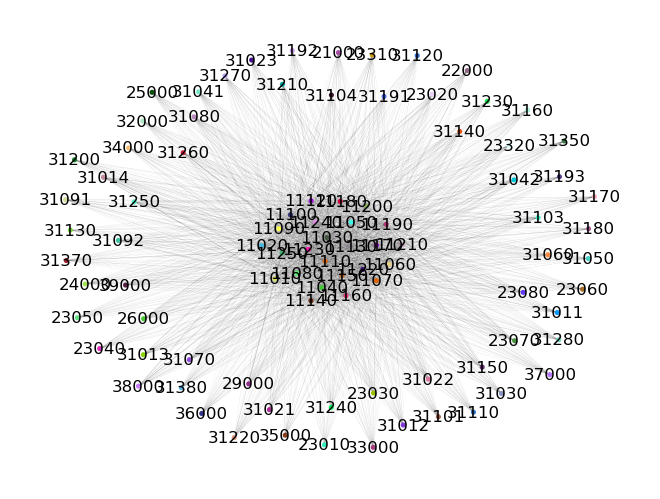

"\nnt = Network(height='1080px', width='80%',)\n\n\n\nnt.from_nx(graph)\nnt.toggle_physics(False)\nnt.show_buttons(filter_=['physics'])\nnt.show('../results/res1.html')\n"

In [4]:
import random


with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv",
          encoding='cp949') as f:
    data = pd.read_csv(f)
    # l.append(data)
#data = data.drop_duplicates(subset=['출발 시군구 코드', '도착 시군구 코드'],)
data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0
print(data['이동인구(합)'].size)

graph = nx.from_pandas_edgelist(data,
                                source='출발 시군구 코드',
                                target='도착 시군구 코드',
                                edge_attr='이동인구(합)',
                                create_using=nx.DiGraph())

#for node in graph:
an = data['도착 시군구 코드']
an = an.drop_duplicates()
print(an)
color = [
    "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(an.size)
]
print(color)
# pos = nx.spring_layout(graph)
# nx.draw_networkx_nodes(graph, pos, node_color=color,)
# nx.draw_networkx_edges(graph, pos, width=0.01,)
#nx.draw(graph, with_labels=False, node_color=color,pos=nx.fruchterman_reingold_layout(graph),node_size=7, arrows=False, width=0.001,)
nx.draw(
    graph,
    with_labels=True,
    node_color=color,
    node_size=7,
    arrows=False,
    width=0.01,
    pos=nx.spring_layout(graph)
)

plt.axis('off')
plt.show()

'''
nt = Network(height='1080px', width='80%',)



nt.from_nx(graph)
nt.toggle_physics(False)
nt.show_buttons(filter_=['physics'])
nt.show('../results/res1.html')
'''

In [30]:
from bokeh.io import output_notebook, show, save, export_svg
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

# import pandas as pd
import networkx as nx

#from selenium import webdriver
from webdriver_manager.firefox import GeckoDriverManager

!export PATH="/home/jovyan/.wdm/drivers/geckodriver/linux64/0.32/:$PATH"
!export PATH="/opt/conda/bin/FirefoxApp/:$PATH"
# PATH 추가 안됨???
!echo $PATH
#webdriver.Firefox(GeckoDriverManager().install())

# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap as Basemap # 이건 지도용
#Choose a title!
title = 'Example Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Character", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html

#save(plot, filename=f"{title}.html")
# from os.path import isfile, join
# print(sorted(onlyfiles))

with open("../large-datasets/생활이동_자치구_202209/생활이동_자치구_2022.09_00시.csv", encoding='cp949') as f:
    data = pd.read_csv(f)
    # l.append(data)
data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0
print(data['이동인구(합)'].size)

graph = nx.from_pandas_edgelist(data, source='출발 시군구 코드', target='도착 시군구 코드', edge_attr='이동인구(합)', create_using=nx.DiGraph())

network_graph = from_networkx(graph, nx.spring_layout)

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=10, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=0.1)

#Add network graph to the plot
plot.renderers.append(network_graph)

export_svg(plot, filename="../results/plot1.pdf")
# save(plot)
# html = file_html(plot, CDN, "my plot")

/opt/conda/bin:/home/jovyan/.vscode-server/bin/6261075646f055b99068d3688932416f2346dd3b/bin/remote-cli:/opt/conda/bin:/opt/conda/condabin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin
785476


RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.